In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cust_satisfaction.csv")
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [3]:
df.isnull().sum()

Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    0
Age                             0
Flight Distance                 0
Inflight entertainment          0
Baggage handling                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
dtype: int64

In [4]:
df.dropna(inplace=True) 

In [5]:
df.duplicated().sum(
    
)

172

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df["Customer Type"].value_counts()

Customer Type
Loyal Customer       84517
disloyal Customer    18905
Name: count, dtype: int64

In [8]:
loyal_customer = df[df["Customer Type"] == "Loyal Customer"]
disloyal_customer =df[df["Customer Type"] == "disloyal Customer"]

In [9]:
loyal_customer = loyal_customer.sample(20000)
loyal_customer.shape

(20000, 12)

In [10]:
balance_df = pd.concat([loyal_customer, disloyal_customer], axis=0)
balance_df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
16031,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,67,479,3,3,3,0,0.0
18199,Female,Loyal Customer,Business travel,Eco,satisfied,41,733,4,1,4,0,0.0
44920,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,58,3543,1,1,1,0,0.0
79426,Male,Loyal Customer,Business travel,Business,satisfied,45,255,4,4,5,0,7.0
73432,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,22,1721,4,3,4,0,0.0


In [11]:
cat_col = balance_df.select_dtypes("object")
cat_col.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction
16031,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
18199,Female,Loyal Customer,Business travel,Eco,satisfied
44920,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
79426,Male,Loyal Customer,Business travel,Business,satisfied
73432,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied


In [12]:
num_col = balance_df.select_dtypes(exclude="object")
num_col.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
16031,67,479,3,3,3,0,0.0
18199,41,733,4,1,4,0,0.0
44920,58,3543,1,1,1,0,0.0
79426,45,255,4,4,5,0,7.0
73432,22,1721,4,3,4,0,0.0


In [13]:
pd.get_dummies(cat_col,drop_first=True)

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
16031,False,False,True,True,False,False
18199,False,False,False,True,False,True
44920,False,False,False,False,False,False
79426,True,False,False,False,False,True
73432,True,False,True,True,False,False
...,...,...,...,...,...,...
103892,False,True,False,False,False,False
103895,False,True,False,True,False,False
103899,False,True,False,True,False,False
103901,True,True,False,False,False,False


In [14]:
##encoding categorical data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
ohe = OneHotEncoder(drop= "if_binary")
cat_col_encoded = ohe.fit_transform(cat_col).toarray()
cat_col_encoded

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [15]:
column_name = list(ohe.get_feature_names_out())
column_name

['Gender_Male',
 'Customer Type_disloyal Customer',
 'Type of Travel_Personal Travel',
 'Class_Business',
 'Class_Eco',
 'Class_Eco Plus',
 'satisfaction_satisfied']

In [16]:
one_hot = pd.DataFrame(cat_col_encoded,columns=column_name)
one_hot.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [17]:
one_hot = one_hot.reset_index(drop=True)
num_col = num_col.reset_index(drop=True)
final_df = pd.concat([one_hot,num_col],axis=1)
final_df.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,67,479,3,3,3,0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,41,733,4,1,4,0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,58,3543,1,1,1,0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,45,255,4,4,5,0,7.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,22,1721,4,3,4,0,0.0


In [18]:
##
final_df.to_csv("cleaned_cust_statisfaction.csv",index=False)

In [19]:
x = final_df.drop("Customer Type_disloyal Customer",axis=1)
y = final_df[["Customer Type_disloyal Customer"]]

In [20]:
##split data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,
                                                 random_state=42)


In [21]:
##model build 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

c:\Users\jaikr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jaikr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
model.score(x_test,y_test)

0.8590155507004241

In [23]:
model.score(x_train,y_train)

0.8586942552371161

In [24]:
pred = model.predict(x_test)
y_test["prediction"] = pred
y_test

,Customer Type_disloyal Customer,prediction
18536,0.0,0.0
36240,1.0,1.0
5426,0.0,0.0
21679,1.0,1.0
18714,0.0,1.0
...,...,...
23667,1.0,1.0
9774,0.0,0.0
24880,1.0,1.0
38451,1.0,1.0


In [ ]:
## model  erformance 
##reg  --- mse , mae , Rmse 
#class -- confusion matrix , classification re

In [26]:
from sklearn.metrics import confusion_matrix,classification_report

In [27]:
confusion_matrix(y_test["Customer Type_disloyal Customer"],
   y_test["prediction"]              )

array([[3427,  575],
       [ 522, 3257]], dtype=int64)

<Axes: >

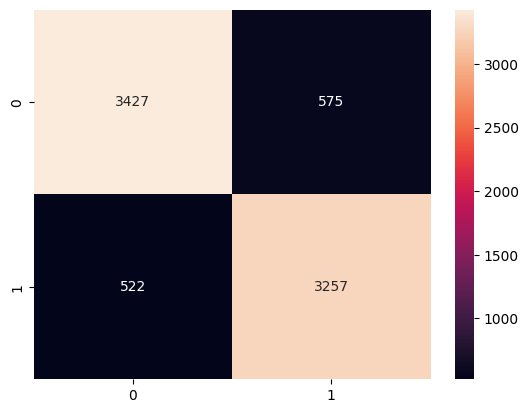

In [30]:
##graph --heatmap 
sns.heatmap(confusion_matrix(y_test["Customer Type_disloyal Customer"],
   y_test["prediction"]),annot=True,fmt="d")

In [32]:
##classification report 
print(classification_report(y_test["Customer Type_disloyal Customer"],
   y_test["prediction"] ))

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      4002
         1.0       0.85      0.86      0.86      3779

    accuracy                           0.86      7781
   macro avg       0.86      0.86      0.86      7781
weighted avg       0.86      0.86      0.86      7781



In [ ]:
from sklearn.tree import DecisionTreeClassifier